## Import necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV,learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR, LinearSVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

## Load and understand the dataset

In [4]:
data = pd.read_csv(r"C:\Users\OMAR\Desktop\TTU\online+news+popularity\OnlineNewsPopularity\OnlineNewsPopularity.csv")

In [5]:
data.head(10)

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
5,http://mashable.com/2013/01/07/beewi-smart-toys/,731.0,10.0,370.0,0.559889,1.0,0.698198,2.0,2.0,0.0,...,0.136364,0.6,-0.195000,-0.400,-0.100000,0.642857,0.214286,0.142857,0.214286,855
6,http://mashable.com/2013/01/07/bodymedia-armba...,731.0,8.0,960.0,0.418163,1.0,0.549834,21.0,20.0,20.0,...,0.100000,1.0,-0.224479,-0.500,-0.050000,0.000000,0.000000,0.500000,0.000000,556
7,http://mashable.com/2013/01/07/canon-poweshot-n/,731.0,12.0,989.0,0.433574,1.0,0.572108,20.0,20.0,20.0,...,0.100000,1.0,-0.242778,-0.500,-0.050000,1.000000,0.500000,0.500000,0.500000,891
8,http://mashable.com/2013/01/07/car-of-the-futu...,731.0,11.0,97.0,0.670103,1.0,0.836735,2.0,0.0,0.0,...,0.400000,0.8,-0.125000,-0.125,-0.125000,0.125000,0.000000,0.375000,0.000000,3600
9,http://mashable.com/2013/01/07/chuck-hagel-web...,731.0,10.0,231.0,0.636364,1.0,0.797101,4.0,1.0,1.0,...,0.100000,0.5,-0.238095,-0.500,-0.100000,0.000000,0.000000,0.500000,0.000000,710


In [6]:
data.shape

(39644, 61)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

In [8]:
data.isnull().sum().sum()

0

In [9]:
data.dtypes

url                               object
 timedelta                       float64
 n_tokens_title                  float64
 n_tokens_content                float64
 n_unique_tokens                 float64
                                  ...   
 title_subjectivity              float64
 title_sentiment_polarity        float64
 abs_title_subjectivity          float64
 abs_title_sentiment_polarity    float64
 shares                            int64
Length: 61, dtype: object

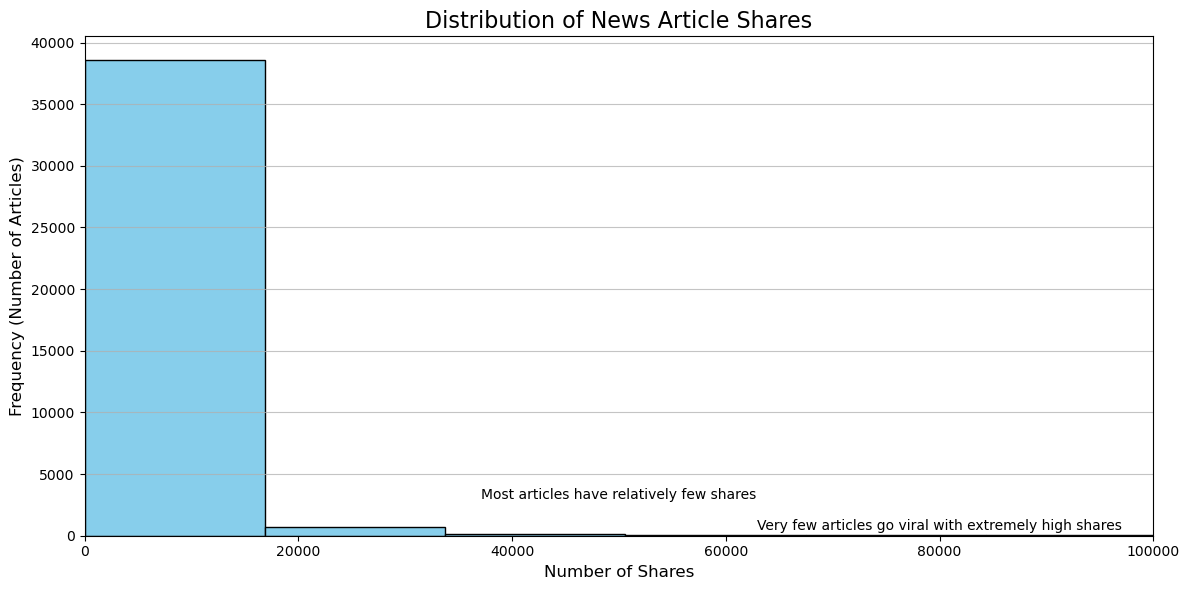

In [10]:
# show the skewed distribution
plt.figure(figsize=(12, 6))
plt.hist(data[' shares'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of News Article Shares', fontsize=16)
plt.xlabel('Number of Shares', fontsize=12)
plt.ylabel('Frequency (Number of Articles)', fontsize=12)
plt.grid(axis='y', alpha=0.75)
plt.xlim(0, 100000)  
plt.xticks(np.arange(0, 100001, 20000))
plt.text(50000, 3000, 'Most articles have relatively few shares', fontsize=10, ha='center')
plt.text(80000, 500, 'Very few articles go viral with extremely high shares', fontsize=10, ha='center')

plt.tight_layout()
plt.show()

# Preprocessing

### -Feature selection

In [13]:
X = data.drop(['url', ' timedelta', ' shares'], axis=1)
y = data[' shares']

In [14]:
y = np.log1p(y)

### -Splitting data

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### -Scaling features

In [18]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### -L2 Regularization (Standard SVR with RBF kernel)

In [20]:
svr_l2 = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr_l2.fit(X_train_scaled, y_train)
y_pred_l2 = svr_l2.predict(X_test_scaled)

### -L1 Regularization (Linear SVR with epsilon-insensitive loss)


In [22]:
svr_l1 = LinearSVR(epsilon=0.1, loss='epsilon_insensitive', C=1.0, random_state=42)
svr_l1.fit(X_train_scaled, y_train)
y_pred_l1 = svr_l1.predict(X_test_scaled)

D:\ANACONDA\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
D:\ANACONDA\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


# Evaluate models

In [24]:
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} Performance:")
    print(f"MSE: {mse:.4f}")
    print(f"R-squared: {r2:.4f}\n")

In [25]:
evaluate_model(y_test, y_pred_l2, "SVR with L2 Regularization")
evaluate_model(y_test, y_pred_l1, "SVR with L1 Regularization")

SVR with L2 Regularization Performance:
MSE: 0.7507
R-squared: 0.1242

SVR with L1 Regularization Performance:
MSE: 0.7837
R-squared: 0.0857



# Hyperparameter tuning

In [27]:
param_grid = {'C': [0.1, 1, 10], 'epsilon': [0.1]}
grid_search = GridSearchCV(LinearSVR(max_iter=10000), param_grid, cv=3,
                          n_jobs=-1,verbose=2)
grid_search.fit(X_train_scaled,y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


D:\ANACONDA\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


GridSearchCV(cv=3, estimator=LinearSVR(max_iter=10000), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'epsilon': [0.1]}, verbose=2)

In [28]:
best_svr_l2 = grid_search.best_estimator_
y_pred_best_l2 = best_svr_l2.predict(X_test_scaled)
evaluate_model(y_test, y_pred_best_l2, "Optimized SVR with L2 Regularization")

Optimized SVR with L2 Regularization Performance:
MSE: 0.7815
R-squared: 0.0883



# Feature importance from L1 model


In [30]:
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': np.abs(svr_l1.coef_)
}).sort_values('importance', ascending=False)

In [31]:
print("Top 10 most important features from L1 model:")
print(feature_importance.head(10))

Top 10 most important features from L1 model:
                           feature  importance
3                 n_non_stop_words    0.941899
2                  n_unique_tokens    0.586267
25                      kw_avg_avg    0.455427
4         n_non_stop_unique_tokens    0.346644
24                      kw_max_avg    0.266385
37                          LDA_00    0.073402
12   data_channel_is_entertainment    0.068677
15            data_channel_is_tech    0.057593
23                      kw_min_avg    0.056039
9             average_token_length    0.048659


# Visualizations

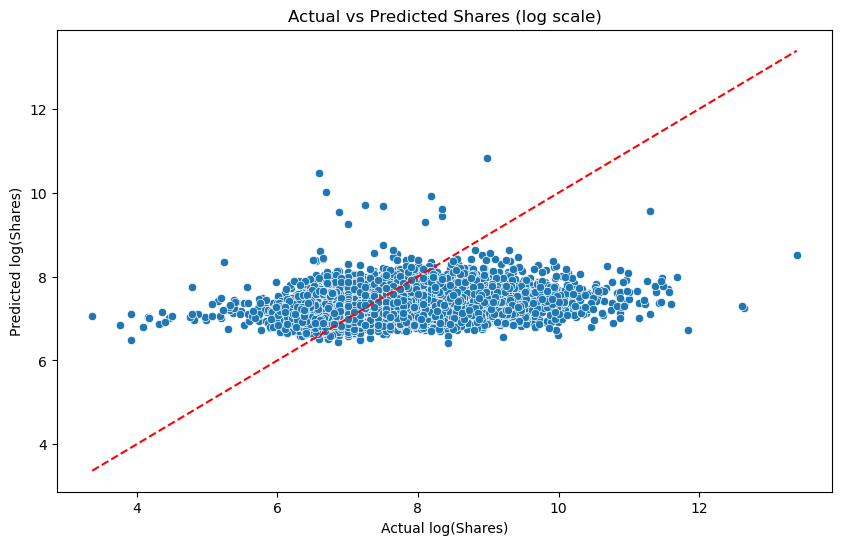

In [33]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test,y=y_pred_best_l2)
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],'--r')
plt.xlabel('Actual log(Shares)')
plt.ylabel('Predicted log(Shares)')
plt.title('Actual vs Predicted Shares (log scale)')
plt.show()

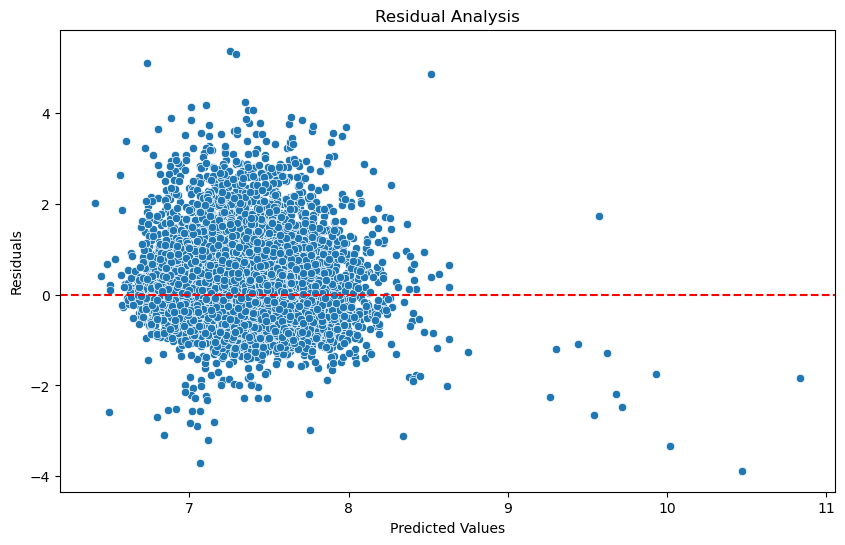

In [34]:
residuals = y_test - y_pred_best_l2

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_best_l2, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Analysis')
plt.show()

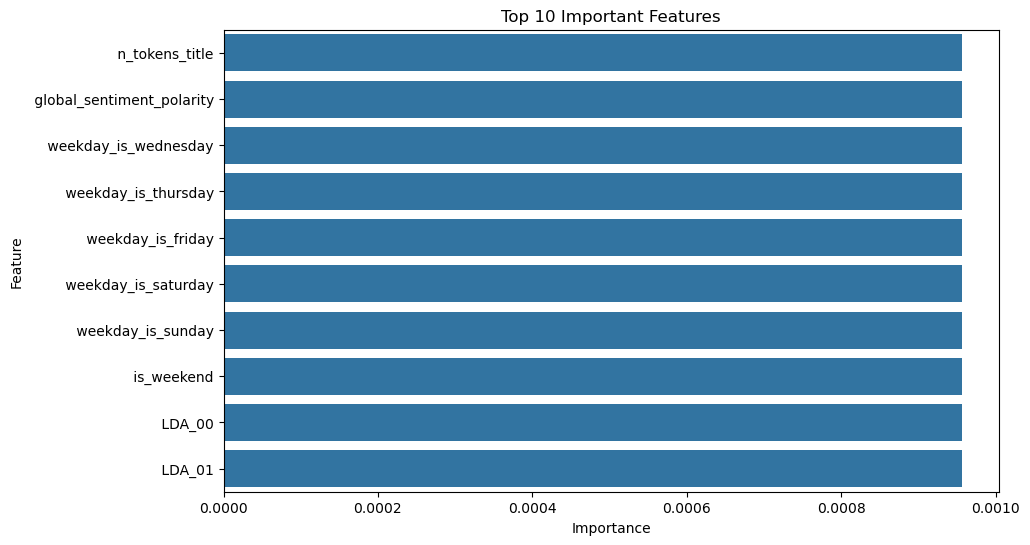

In [35]:
if hasattr(best_svr_l2, 'coef_'):
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': abs(best_svr_l2.coef_[0])
    }).sort_values('Importance', ascending=False).head(10)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance)
    plt.title('Top 10 Important Features')
    plt.show()
else:
    print("Feature importance not available for RBF kernel")

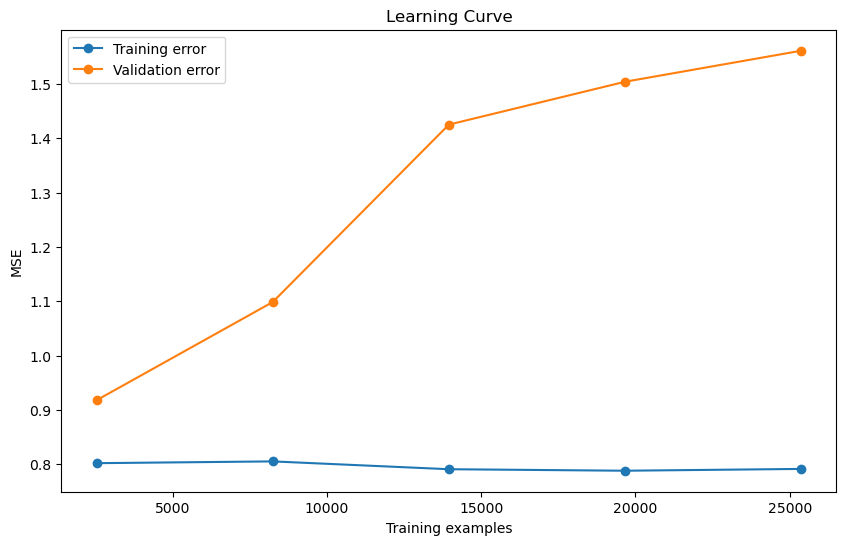

In [36]:
train_sizes, train_scores, test_scores = learning_curve(
    best_svr_l2, X_train_scaled, y_train, cv=5,
    scoring='neg_mean_squared_error', n_jobs=-1
)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, -train_scores.mean(axis=1), 'o-', label='Training error')
plt.plot(train_sizes, -test_scores.mean(axis=1), 'o-', label='Validation error')
plt.xlabel('Training examples')
plt.ylabel('MSE')
plt.legend()
plt.title('Learning Curve')
plt.show()

D:\ANACONDA\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
D:\ANACONDA\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
D:\ANACONDA\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
D:\ANACONDA\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


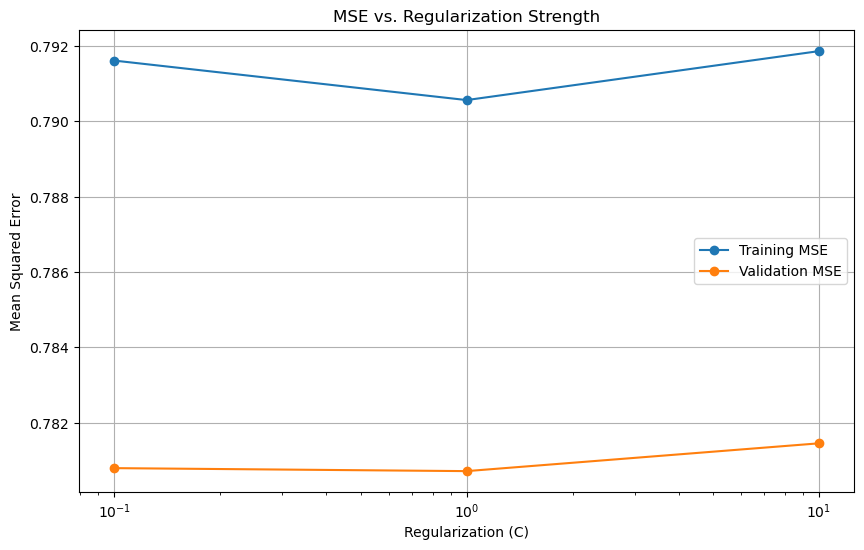

In [37]:
train_errors = []
val_errors = []
Cs = [0.1, 1, 10]  

for C in Cs:
    model = LinearSVR(C=C, epsilon=0.1, max_iter=10000)
    model.fit(X_train_scaled, y_train)
    train_errors.append(mean_squared_error(y_train, model.predict(X_train_scaled)))
    val_errors.append(mean_squared_error(y_test, model.predict(X_test_scaled)))

plt.figure(figsize=(10, 6))
plt.plot(Cs, train_errors, 'o-', label='Training MSE')
plt.plot(Cs, val_errors, 'o-', label='Validation MSE')
plt.xscale('log')
plt.xlabel('Regularization (C)')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs. Regularization Strength')
plt.legend()
plt.grid()
plt.show()

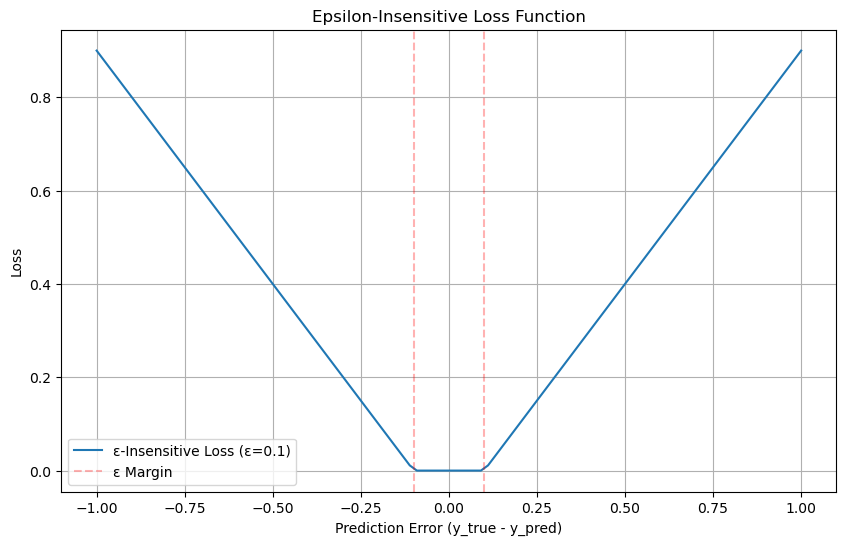

In [38]:
def epsilon_loss(error, epsilon=0.1):
    return np.maximum(0, np.abs(error) - epsilon)

errors = np.linspace(-1, 1, 100)
plt.figure(figsize=(10, 6))
plt.plot(errors, epsilon_loss(errors), label='ε-Insensitive Loss (ε=0.1)')
plt.xlabel('Prediction Error (y_true - y_pred)')
plt.ylabel('Loss')
plt.title('Epsilon-Insensitive Loss Function')

plt.axvline(-0.1, color='r', linestyle='--', alpha=0.3)
plt.axvline(0.1, color='r', linestyle='--', alpha=0.3, label='ε Margin')
plt.legend()
plt.grid()
plt.show()

D:\ANACONDA\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
D:\ANACONDA\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
D:\ANACONDA\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
D:\ANACONDA\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
D:\ANACONDA\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change

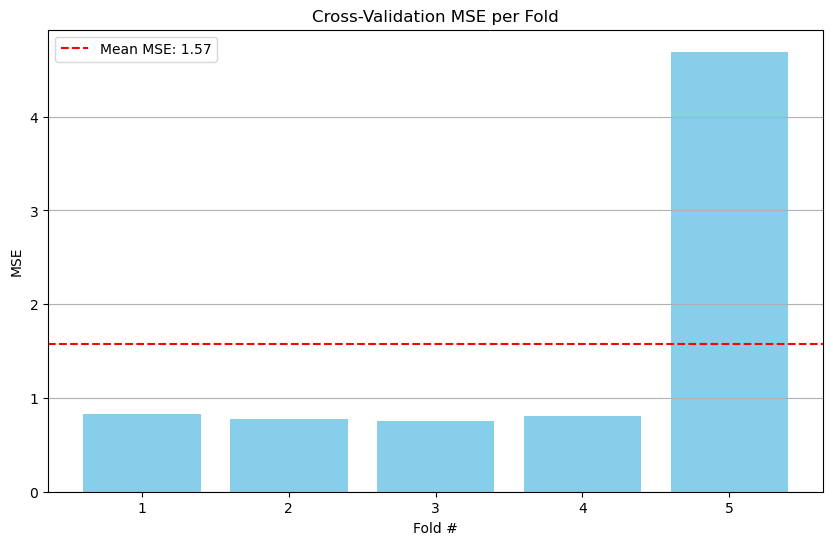

In [39]:
cv_scores = cross_val_score(
    best_svr_l2, X_train_scaled, y_train, 
    cv=5, scoring='neg_mean_squared_error'
)

plt.figure(figsize=(10, 6))
plt.bar(range(1, 6), -cv_scores, color='skyblue')
plt.xlabel('Fold #')
plt.ylabel('MSE')
plt.title('Cross-Validation MSE per Fold')
plt.axhline(-cv_scores.mean(), color='r', linestyle='--', label=f'Mean MSE: {-cv_scores.mean():.2f}')
plt.legend()
plt.grid(axis='y')
plt.show()

C:\Users\OMAR\AppData\Local\Temp\ipykernel_2104\4237322483.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(mse_scores.keys()), y=list(mse_scores.values()), palette='viridis')


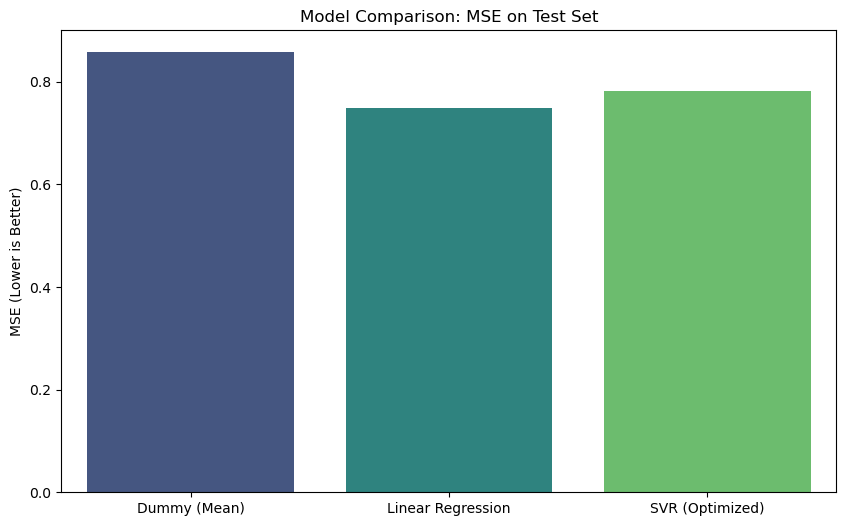

In [40]:
dummy = DummyRegressor(strategy='mean').fit(X_train_scaled, y_train)
linear = LinearRegression().fit(X_train_scaled, y_train)


models = {
    'Dummy (Mean)': dummy,
    'Linear Regression': linear,
    'SVR (Optimized)': best_svr_l2
}

mse_scores = {
    name: mean_squared_error(y_test, model.predict(X_test_scaled))
    for name, model in models.items()
}

plt.figure(figsize=(10, 6))
sns.barplot(x=list(mse_scores.keys()), y=list(mse_scores.values()), palette='viridis')
plt.ylabel('MSE (Lower is Better)')
plt.title('Model Comparison: MSE on Test Set')
plt.savefig("my_plot.png")
plt.show()